# Scientific Programming II

### Justin Kitzes

In this second lesson, we'll apply the core elements of programming languages to a common scientific task: reading a data table, performing analysis on its contents, and saving the results. As we go through these different stages of analysis, we'll note how each task relates to one of the elements from the last lesson (we'll note these as `E1`, for example, for element 1, "a thing").

For this lesson, we'll use two important scientific Python packages. `numpy` is the main package providing numerical analysis functions, and `pandas` is designed to make it easy to work with tabular data.

In [2]:
# Import pandas and set up inline plotting
import pandas as pd
%matplotlib inline

## 1. Reading and examining a data table

Unless you're generating your own data by simulation (as in our previous logistic growth function), most scientific analyses begin with loading an external data set.

For this lesson, we'll use data from the North American Breeding Bird Survey. As part of this survey, volunteers have driven cars along fixed routes once a year for the past forty years, stopping periodically along the way and counting all of the birds that they see when they do. The particular data tables that we'll work with today summarize the number of birds of many different species that were counted along routes in the state of California. The large table contains forty years of data for all sighted species, while the small table is a subset of the large table.

You can download and play with this data yourself at:

Pardieck, K.L., D.J. Ziolkowski Jr., M.-A.R. Hudson. 2015. North American Breeding Bird Survey Dataset 1966 - 2014, version 2014.0. U.S. Geological Survey, Patuxent Wildlife Research Center http://www.pwrc.usgs.gov/BBS/RawData/.

__Tip:__ It's often a good idea to take a large data set and extract a small portion of it to use while building and testing your analysis code. Small data sets can be analyzed faster and allow you to see, visually, what the "right answer" should be when you write code to perform analysis. Determining whether your function gives the right answer on a small data set is the core idea behind unit testing, which we'll discuss later.

In [3]:
# You can use the exclamation point symbol (the "bang") to run a shell command
# Let's use cat to see the contents of the small data table
!cat birds_sm.csv

Species,2010,2011,2012,2013,2014
Barn Owl,0,7,5,2,1
Flammulated Owl,0,0,0,0,0
Western Screech-Owl,2,1,2,5,0
Great Horned Owl,33,41,52,52,50
Northern Pygmy-Owl,5,3,15,16,10
Burrowing Owl,104,26,32,8,17
Spotted Owl,0,0,0,0,1
Barred Owl,2,2,0,0,0
Great Gray Owl,1,0,0,0,0
Long-eared Owl,0,0,3,0,0
Short-eared Owl,0,11,1,0,0


In [4]:
# Read the small table using pandas
# The DataFrame function (E2) in pandas creates a thing (E1) called a DataFrame
#pd.read_csv?
birds_df = pd.read_csv('birds_sm.csv', index_col='Species')
print(type(birds_df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
# Now let's look at the contents of our data frame "thing" (E1)
print(birds_df)

                     2010  2011  2012  2013  2014
Species                                          
Barn Owl                0     7     5     2     1
Flammulated Owl         0     0     0     0     0
Western Screech-Owl     2     1     2     5     0
Great Horned Owl       33    41    52    52    50
Northern Pygmy-Owl      5     3    15    16    10
Burrowing Owl         104    26    32     8    17
Spotted Owl             0     0     0     0     1
Barred Owl              2     2     0     0     0
Great Gray Owl          1     0     0     0     0
Long-eared Owl          0     0     3     0     0
Short-eared Owl         0    11     1     0     0


In [6]:
# Like other "things" in Python, a data frame is an object
# The object contains methods that operate on it (E2)
#birds_sm.
print(birds_df.max())
print(birds_df.max(1))

2010    104
2011     41
2012     52
2013     52
2014     50
dtype: int64
Species
Barn Owl                 7
Flammulated Owl          0
Western Screech-Owl      5
Great Horned Owl        52
Northern Pygmy-Owl      16
Burrowing Owl          104
Spotted Owl              1
Barred Owl               2
Great Gray Owl           1
Long-eared Owl           3
Short-eared Owl         11
dtype: int64


A data frame can be conceptualized as a kind of "thing", like we have above, that we can move around and perform operations on. However, it also shares some characteristics in common with a collection of things (E3) because we can use indexes and slicing to pull out subsets of the data table.

There are two main ways that we can select rows and columns from our table: using the labels for the rows and columns or using numeric indexes for the row and column locations. Below we'll focus on label names - check out the `pandas` help for the method `iloc` to learn about using numeric indexes.

In [7]:
# Look at the table again and think about it as a collection (E3)
print(birds_df)

                     2010  2011  2012  2013  2014
Species                                          
Barn Owl                0     7     5     2     1
Flammulated Owl         0     0     0     0     0
Western Screech-Owl     2     1     2     5     0
Great Horned Owl       33    41    52    52    50
Northern Pygmy-Owl      5     3    15    16    10
Burrowing Owl         104    26    32     8    17
Spotted Owl             0     0     0     0     1
Barred Owl              2     2     0     0     0
Great Gray Owl          1     0     0     0     0
Long-eared Owl          0     0     3     0     0
Short-eared Owl         0    11     1     0     0


In [8]:
# Use the loc method to pull out rows and columns by name
# Like a matrix, the row goes first, then the column
print(birds_df.loc['Barn Owl','2011'])
print(birds_df.loc['Barred Owl','2010'])

7
2


In [9]:
# You can use ranges of names, similar to what we saw before for lists
print(birds_df.loc['Burrowing Owl':,'2011':'2013'])
print(birds_df.loc[:'Great Horned Owl',:])

                 2011  2012  2013
Species                          
Burrowing Owl      26    32     8
Spotted Owl         0     0     0
Barred Owl          2     0     0
Great Gray Owl      0     0     0
Long-eared Owl      0     3     0
Short-eared Owl    11     1     0
                     2010  2011  2012  2013  2014
Species                                          
Barn Owl                0     7     5     2     1
Flammulated Owl         0     0     0     0     0
Western Screech-Owl     2     1     2     5     0
Great Horned Owl       33    41    52    52    50


In [10]:
# You can also use lists of names
print(birds_df.loc[['Barn Owl', 'Great Horned Owl'], ['2010', '2014']])

                  2010  2014
Species                     
Barn Owl             0     1
Great Horned Owl    33    50


## 2. Perform analysis

Once we have our data table read in, we generally want to perform some sort of analysis with it. Let's presume that we want to get a count of the mean number of individuals sighted per species in each year. However, we only want the average over the species that were actually sighted in the state that year, ignoring species with counts of zero (this is a fairly common analysis in ecology).

Conceptually, one way to approach this problem is to imagine looping through (E4) all of the years, that is the columns of the data frame, one by one. For each year, we want to count the number of species present, sum their counts, and divide the sum of the counts by the number of species seen. We should record this information in some other sort of collection (E3) - we'll use another data frame.

In [11]:
# First, let's set up a new data frame to hold the result of our calculation
# We'll get the column names from the bird table, then use DataFrame to make a new df
years = birds_df.columns  # A collection called a Series in pandas
print(years)

results_df = pd.DataFrame(index=['Mean'], columns=years)
print(results_df)

Index(['2010', '2011', '2012', '2013', '2014'], dtype='object')
     2010 2011 2012 2013 2014
Mean  NaN  NaN  NaN  NaN  NaN


In [12]:
# Next, let's figure out how we would do our analysis for one year, say 2010
print(birds_df['2010'])

print(birds_df['2010'].sum())

print(birds_df['2010'] > 0)
print((birds_df['2010'] > 0).sum())

Species
Barn Owl                 0
Flammulated Owl          0
Western Screech-Owl      2
Great Horned Owl        33
Northern Pygmy-Owl       5
Burrowing Owl          104
Spotted Owl              0
Barred Owl               2
Great Gray Owl           1
Long-eared Owl           0
Short-eared Owl          0
Name: 2010, dtype: int64
147
Species
Barn Owl               False
Flammulated Owl        False
Western Screech-Owl     True
Great Horned Owl        True
Northern Pygmy-Owl      True
Burrowing Owl           True
Spotted Owl            False
Barred Owl              True
Great Gray Owl          True
Long-eared Owl         False
Short-eared Owl        False
Name: 2010, dtype: bool
6


In [13]:
# Our final calculation code could look like this
birds_this_year = birds_df['2010']
sum_counts = birds_this_year.sum()
species_seen = (birds_this_year > 0).sum()
result = sum_counts / species_seen

print(result)
print(147/6)

24.5
24.5


### Exercise 1 - Calculating mean counts for every year

1. Put the above calculation code into a `for` loop (E4) that loops over all years, calculating the mean count of birds per species present each year, and stores the result in a new empty data frame.
2. Put all of the code that you just wrote into a new function (E6) that takes, as an argument, a data frame of bird counts (like `bird_sm`) and returns the result data frame. Test it with `bird_sm` to make sure that it works.

__Bonus:__

1. Using label-based indexing, create a new data frame that has the same years but only includes these three species: Spotted Owl, Barred Owl, Great Gray Owl. Try running your function using this new smaller data frame and look at the results. Do you see a result that you may not want?
2. Add an `if-else` statement (E5) that checks for the problem that you just uncovered and takes some reasonable action when it occurs.

In [14]:
def count_birds(birds_df):
    years = birds_df.columns
    results_df = pd.DataFrame(index=['Mean'], columns=years)
    
    for year in years:
        birds_this_year = birds_df[year]
        sum_counts = birds_this_year.sum()
        species_seen = (birds_this_year > 0).sum()
        
        if species_seen == 0:
            results_df[year] = 0
        else:
            results_df[year] = sum_counts / species_seen
    
    return results_df

print(count_birds(birds_df))

      2010  2011       2012  2013  2014
Mean  24.5    13  15.714286  16.6  15.8


In [15]:
birds_df_2 = birds_df.loc[['Spotted Owl', 'Barred Owl', 'Great Gray Owl']]
print(birds_df_2)
print(count_birds(birds_df_2))

                2010  2011  2012  2013  2014
Species                                     
Spotted Owl        0     0     0     0     1
Barred Owl         2     2     0     0     0
Great Gray Owl     1     0     0     0     0
      2010  2011  2012  2013  2014
Mean   1.5     2     0     0     1


## 3. Save the results

Now that we've managed to generate some useful results, we want to save them somewhere on our computer for later use. There are two broad types of outputs that we might want to save, tables and plots, and we'll use the built-in methods for data frames to do both.

Getting a plot to look just right can take a very long time. Here we'll just use the pandas default styles. For more help on plotting, have a look at the extra lesson on `matplotlib`.

In [16]:
# First we make sure that we've saved our results table
results_df = count_birds(birds_df)
print(results_df)

      2010  2011       2012  2013  2014
Mean  24.5    13  15.714286  16.6  15.8


In [17]:
# Data frames have a method to save themselves as a csv file - easy!
results_df.to_csv('birds_results.csv')

/Users/jkitzes/miniconda3/lib/python3.4/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


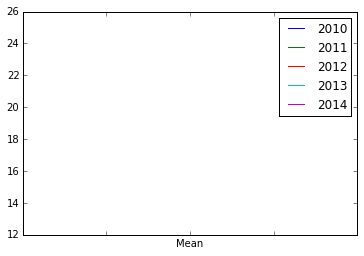

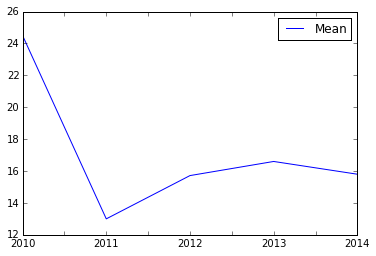

In [18]:
# Data frames also have a method to plot their contents
# There's one trick though - by default they put the rows on the x axis and columns on the y
# We want the reverse, so we need to transpose our data frame before plotting it
results_df.plot()
results_df.T.plot()

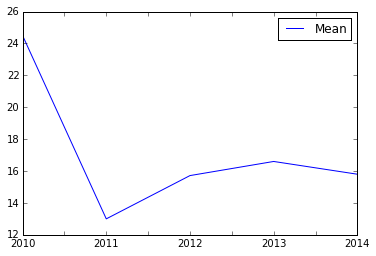

In [19]:
# With a few extra steps, we can save the plot
# This code looks strange, since we haven't talked about the details of matplotlib
# At this stage, it's best to just use it as a recipe
ax = results_df.T.plot()  # Save the plot as an axis object
fig = ax.get_figure()  # From the axis object, get the whole figure
fig.savefig('birds_results.pdf')  # Save the figure

### Exercise 2 - A complete analysis

1. Using all of the code that we wrote above, put the following lines of code in the cell below (this will form a complete analysis that would run without the rest of this notebook):
    - Import the pandas package
    - Read the `birds_sm.csv` table
    - Define a function to perform the analysis (just copy the one you wrote in Exercise 1)
    - Use that function to make a results dataframe for the `birds_sm.csv` data
    - Saves the resulting table as `birds_results.csv`
    - Saves a plot of the result as `birds_results.pdf`
2. To test that your cell works on its own, go to the Jupyter menu bar, under Kernel, and choose "Restart Kernel". This will restart your notebook, so that everything that you've run so far (all the variables stored in memory, in particular) is erased. Run the cell below, and make sure it works correctly.
3. Instead of `bird_sm.csv`, make your cell use `bird_lg.csv` and see what the saved results look like. If necessary, modify your code and variable names so that all you have to do is change two letters (`sm` to `lg`) in one place in the code to make this change.

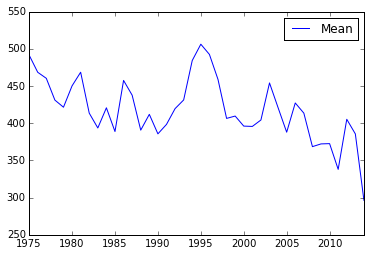

In [20]:
import pandas as pd

birds_df = pd.read_csv('birds_lg.csv', index_col='Species')

def count_birds(birds_df):
    years = birds_df.columns
    results_df = pd.DataFrame(index=['Mean'], columns=years)
    
    for year in years:
        birds_this_year = birds_df[year]
        sum_counts = birds_this_year.sum()
        species_seen = (birds_this_year > 0).sum()
        
        if species_seen == 0:
            results_df[year] = 0
        else:
            results_df[year] = sum_counts / species_seen
    
    return results_df

results_df = count_birds(birds_df)

results_df.to_csv('birds_results.csv')

ax = results_df.T.plot()
fig = ax.get_figure()
fig.savefig('birds_results.pdf')